In [26]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import os
import pandas as pd
import metrics

In [10]:
__filename__ = 'XGboost.model'

with open('.env') as f:
    _data_pth_ = f.readline().strip()
    _data_pth_ = os.path.expanduser(_data_pth_)

### load data

In [13]:
data = pd.read_csv(f'{_data_pth_}/processed/train_transaction.csv', index_col=0)
y, X = data['isFraud'], data.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### configure

In [20]:
xgb.set_config(verbosity=2)

### train


In [22]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
booster = xgb.train({
    'objective': 'binary:logistic', 
    'eval_metric': ['auc', 'ams@0'],
    'max_depth': 50,
    'num_parallel_tree': 5,
}, dtrain=dtrain)

[20:12:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 3728 extra nodes, 0 pruned nodes, max_depth=35
[20:12:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 3728 extra nodes, 0 pruned nodes, max_depth=35
[20:12:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 3728 extra nodes, 0 pruned nodes, max_depth=35
[20:12:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 3728 extra nodes, 0 pruned nodes, max_depth=35
[20:12:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 3728 extra nodes, 0 pruned nodes, max_depth=35
[20:12:26] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 4536 extra nodes, 0 pruned nodes, max_depth=47
[20:12:26] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 4536 extra nodes, 0 pruned nodes, max_depth=47
[20:12:26] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 4536 extra nodes, 0 pruned nodes, max_depth=47
[20:12:26] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 453

### test

Test data
[[3645, 187717], [332, 3185]]
Misclassification error =  3517
SENS(recall)  =  0.5336749633967789
SPEC   =  0.9982345027094002
PPV(Precision)   =  0.9165199899421674
NPV   =  0.9833160469769829


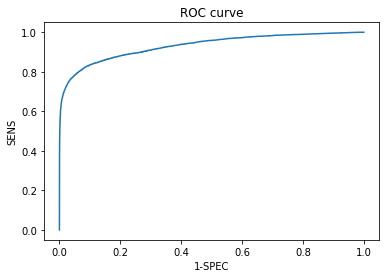

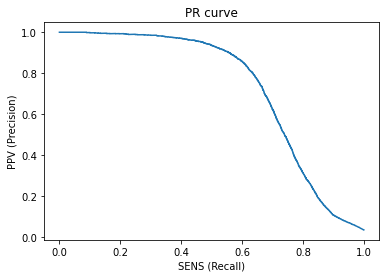

In [41]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve

### Roc curve and PR curve
def roc_pr_curve(y_test, probs_predict):
    # Draw the ROC curve
    plt.figure(1)
    # ROC curve components
    fpr, tpr, thresholdsROC = roc_curve(y_test, probs_predict)
    #plot
    plt.plot(fpr,tpr)
    plt.title("ROC curve")
    plt.xlabel("1-SPEC")
    plt.ylabel("SENS")
    plt.show
    
    # Draw the PR curve
    plt.figure(2)
    # Components of the Precision recall curvey
    precision, recall, thresholdsPR = precision_recall_curve(y_test, probs_predict)
    # plot
    plt.plot(recall,precision)
    plt.title("PR curve")
    plt.xlabel("SENS (Recall)")
    plt.ylabel("PPV (Precision)")
    plt.show
    

y_pred_probs = booster.predict(dtest)
roc_pr_curve(y_test, y_pred_probs)
y_pred_probs[y_pred_probs >= 0.5] = 1
y_pred_probs[y_pred_probs < 0.5] = 0
metrics.conf_matrix(y_test, y_pred_probs)


In [39]:
type(y_pred_probs)

numpy.ndarray